# **AF8: Redes Neuronales Convolucionales**

Grupo:013 Hora:N4-N6

Emiliano Alberto Gomar Valdez 2006043
Kevin Alejandro Rivas Montoya 2015346
Jareth Alejandro Giacoman Vallejo 1758554
Erick Tadeo Hernández Soto 2038847

1. Importar librerías

In [1]:
import tensorflow as tf
import keras
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
print(tf.__version__)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

2.19.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


2. Cargar datos

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

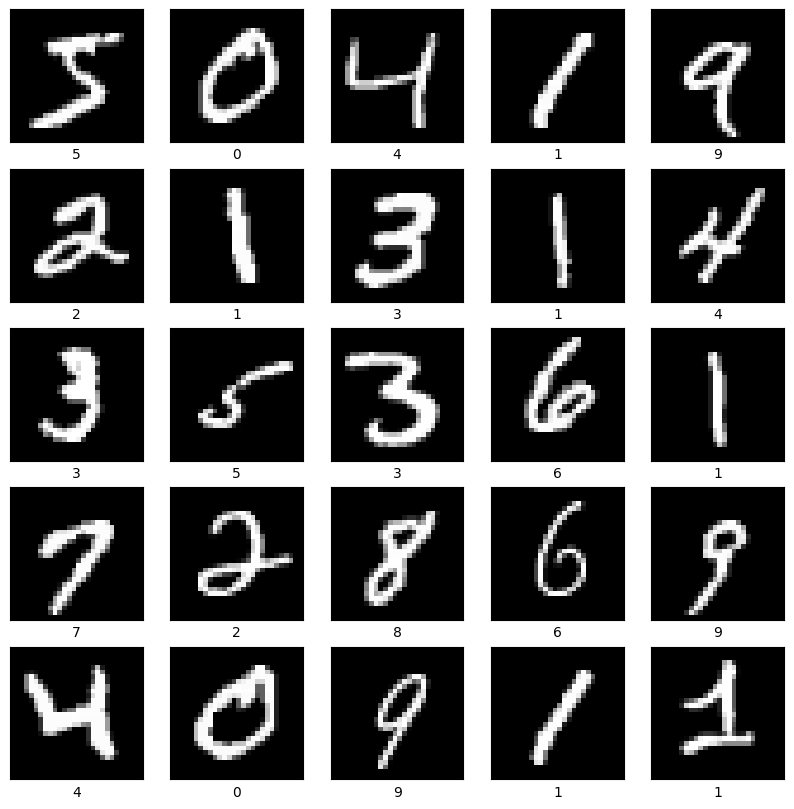

In [3]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()

3. Preprocesamiento de datos

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 clases para dígitos del 0 al 9

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

4. Selección y entrenamiento del modelo

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.8946 - loss: 0.3370 - val_accuracy: 0.9871 - val_loss: 0.0452
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9846 - loss: 0.0463 - val_accuracy: 0.9901 - val_loss: 0.0331
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9899 - loss: 0.0311 - val_accuracy: 0.9892 - val_loss: 0.0352
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9916 - loss: 0.0256 - val_accuracy: 0.9878 - val_loss: 0.0412
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9947 - loss: 0.0173 - val_accuracy: 0.9892 - val_loss: 0.0329
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9949 - loss: 0.0146 - val_accuracy: 0.9896 - val_loss: 0.0341
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9961 - loss: 0.0112 - val_accuracy: 0.9898 - val_loss: 0.0388
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9967 -

5. Prueba del modelo

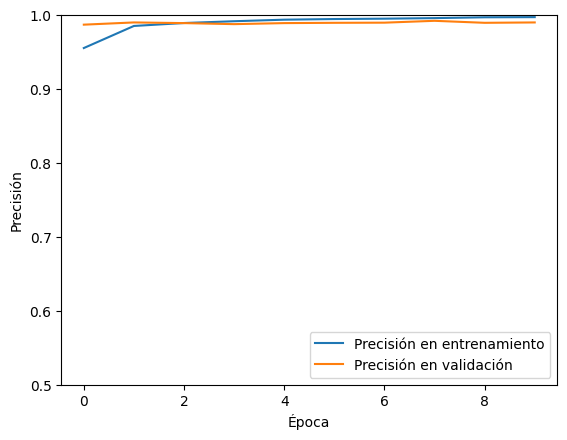

313/313 - 2s - 8ms/step - accuracy: 0.9901 - loss: 0.0437
Precisión final en datos de prueba: 0.9901


In [9]:
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(f'Precisión final en datos de prueba: {test_acc:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


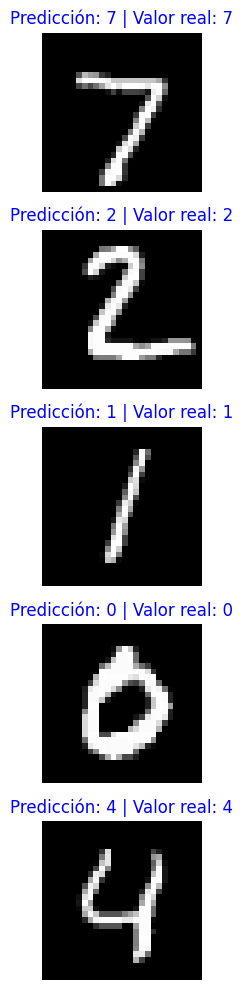

In [11]:
def mostrar_predicciones(n=5):
    plt.figure(figsize=(10, 2 * n))
    for i in range(n):
        imagen = test_images[i].reshape(28, 28)
        entrada = np.expand_dims(test_images[i], axis=0)
        pred = model.predict(entrada)
        prediccion = np.argmax(pred)
        etiqueta_real = test_labels[i]
        color = 'blue' if prediccion == etiqueta_real else 'red'
        plt.subplot(n, 1, i + 1)
        plt.imshow(imagen, cmap='gray')
        plt.title(f"Predicción: {prediccion} | Valor real: {etiqueta_real}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

mostrar_predicciones(5)